In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
import pandas as pd

In [2]:
d1 = pd.read_csv('Data2.csv')
d1['Datetime'] = d1['Datum']+' '+d1['Cas']
d1['Datetime'] = pd.to_datetime(d1['Datetime'], format='%d.%m.%Y %H:%M:%S')

In [3]:
m = np.array([pd.DataFrame]*12)
h  = np.zeros((12, 24))
hs = np.zeros((12, 24))
for i in range(12):
    m[i] = d1[d1['Datum'].str.contains(f'.{i+1:02d}.', regex=False)]
    for j in range(24):
        h[i,j] = np.average(m[i][m[i]['Cas'] == f'{j:02d}:00:00']['Data'])
        hs[i,j]=     np.std(m[i][m[i]['Cas'] == f'{j:02d}:00:00']['Data'])
    print(m[i].shape)

(744, 4)
(672, 4)
(743, 4)
(720, 4)
(744, 4)
(720, 4)
(744, 4)
(744, 4)
(720, 4)
(744, 4)
(720, 4)
(744, 4)


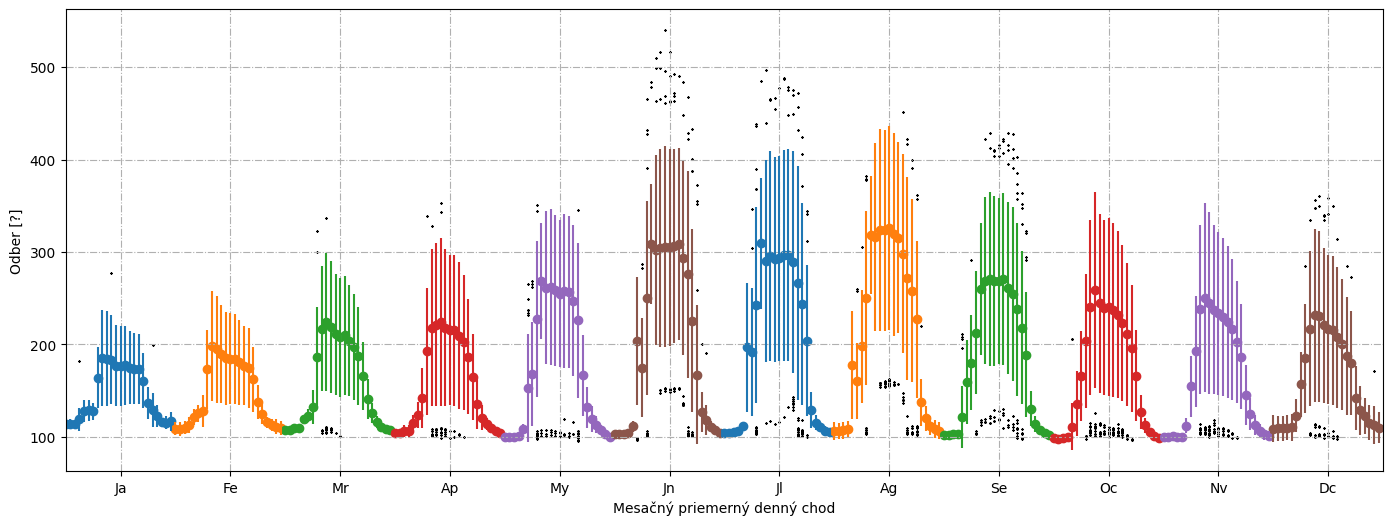

In [4]:
plt.figure(figsize=(17,6))
plt.grid(which='both', linestyle='-.')

plt.xlabel('Mesačný priemerný denný chod')
plt.ylabel('Odber [?]')

clrs = list(clr.TABLEAU_COLORS)

plt.xticks(ticks=[12+24*i for i in range(12)], 
           labels=['Ja', 'Fe', 'Mr', 'Ap', 'My', 'Jn', 
                   'Jl', 'Ag', 'Se', 'Oc', 'Nv', 'Dc'])
for i in range(12):
    for j in range(24):
        a = m[i][m[i]['Cas'] == f'{j:02d}:00:00']
        for ai in a['Data']:
            if ai<h[i,j]*0.5 or ai>h[i,j]*1.5:
                plt.scatter(j+i*24, ai, marker='x', c='k', s=1)
    month_linspace = np.linspace(0, 23, 24, endpoint=True)+(i*24)
    c = clrs[i % 6]
    plt.scatter(month_linspace, h[i], c=c)
    plt.vlines(month_linspace, h[i]-hs[i], h[i]+hs[i], colors=c)
    
plt.xlim(0, 12*24)
plt.savefig('output.png')
plt.show()

In [5]:
clrs

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']